# Performing Feature Engineering

### Steps
- Read combined data
- Check for features
- Check for duplicates
- Check for discrete and contineous values
- Check for multi-colinearlity
- Visualization
- selecting target and features
- Checking for skewness and solving skewness issues
- creating pipeline to train models
- test and evaluate models
- select the best models 

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

In [24]:
new_data= pd.read_csv('new_data.csv')

In [25]:
new_data.head(4)

,School,Sex,Age,Address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Freetime,goout,Dalc,Walc,Health,Absence,G1,G2,G3,Subject
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,maths
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,maths
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,maths
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0,maths


### Note that the categorical variables must be transformened to numerals during feature engineering

In [26]:
### checking for numerical features
numerical_feature=[feature for feature in new_data.columns if new_data[feature].dtype!='O']
categorical_feature=[feature for feature in new_data.columns if new_data[feature].dtype =='O']
print('Number of numeric features are {}'. format(len(numerical_feature)))
print('Number of categorical features are {}'.format(len(categorical_feature)))

Number of numeric features are 16
Number of categorical features are 18


In [28]:
### checking for descrete features
descrete_features=[feature for feature in numerical_feature if len(new_data[feature].unique())>=25]
Contineus_features=[feature for feature in numerical_feature if len(new_data[feature].unique())<25]
print('The number of descrite features are {}'.format(len(descrete_features)))
print('The number of contineous feature is {}'. format(len(Contineus_features)))

The number of descrite features are 1
The number of contineous feature is 15


### observation 
- All numerical features are contineous features

# Selecting the Target

In [29]:
X=new_data.drop('G3', axis=1)
y=new_data['G3']

In [30]:
X.head(3)

,School,Sex,Age,Address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,Freetime,goout,Dalc,Walc,Health,Absence,G1,G2,Subject
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,maths
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,maths
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,maths


In [31]:
y.head(4)

0     6.0
1     6.0
2    10.0
3    15.0
Name: G3, dtype: float64

# checking for skewness

In [33]:
num_x=[feature for feature in X.columns if X[feature].dtype !='O'] 

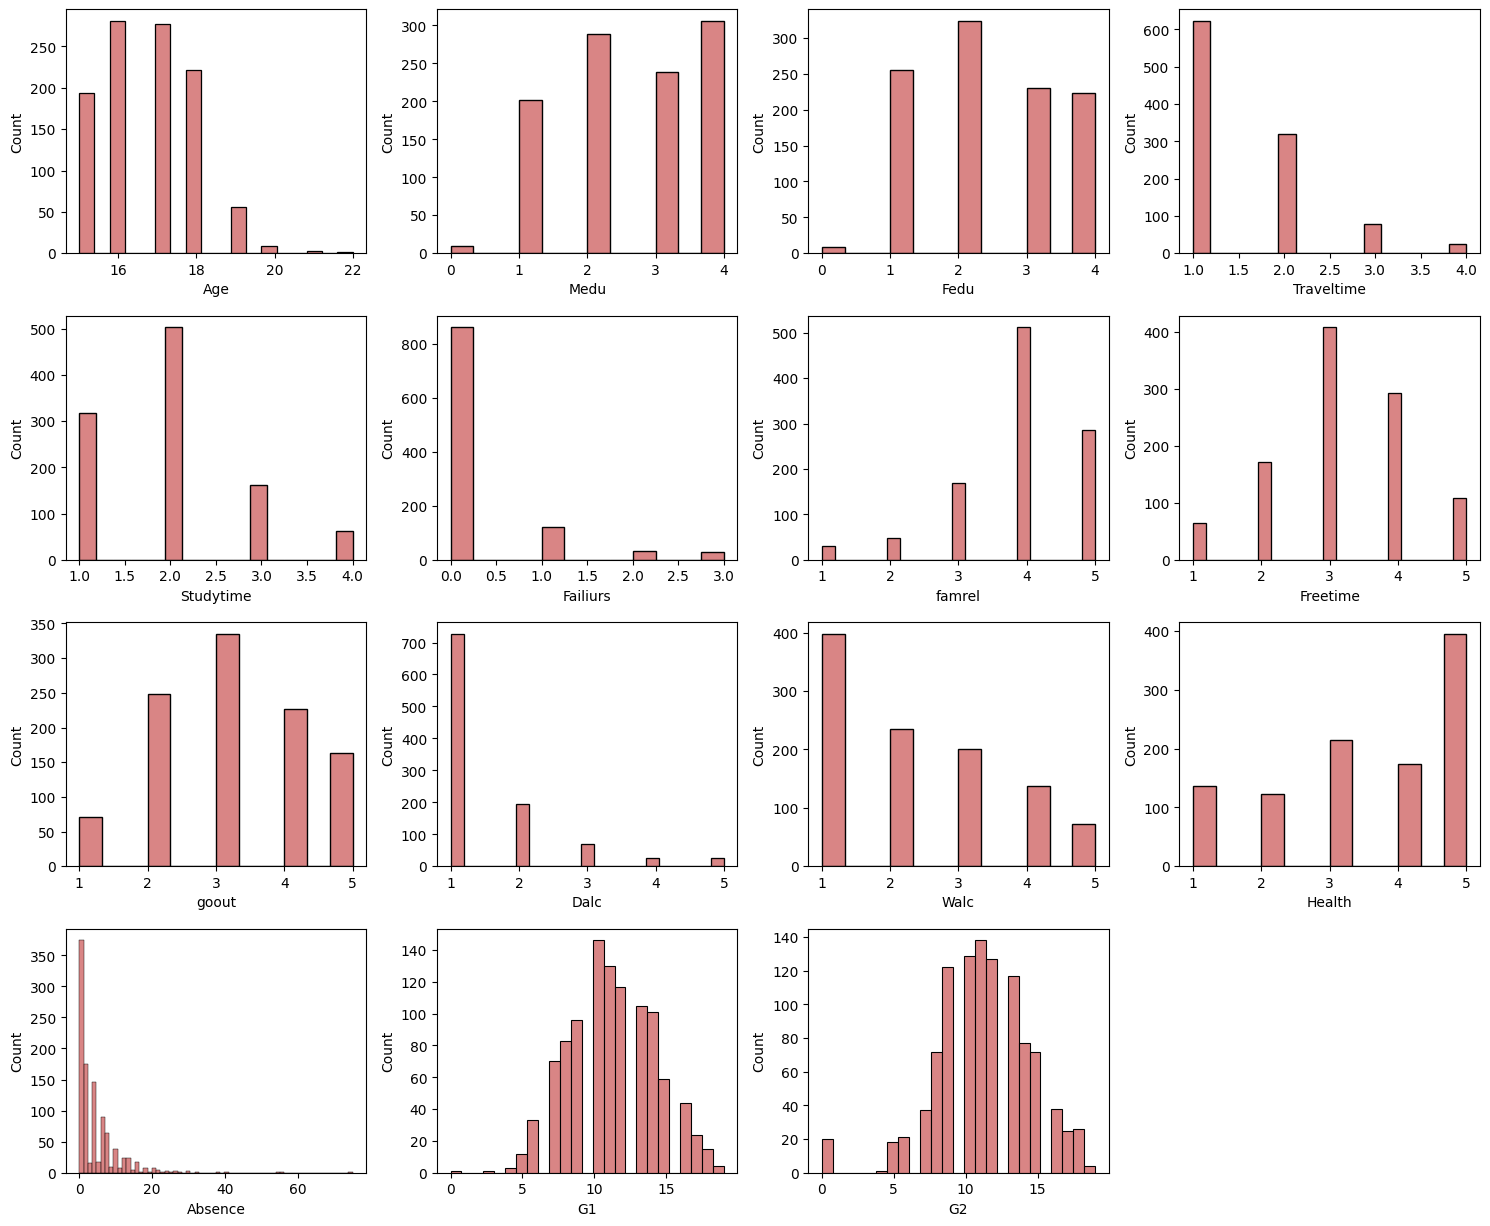

In [34]:
# distribution of data before scaling
plt.figure(figsize=(15, 15))
for i in range(len(num_x)):
    plt.subplot(5, 4, i+1)
    sns.histplot(X[num_x[i]], color='indianred')
    plt.xlabel(num_x[i])
    plt.tight_layout()

# Checking for skewness in target

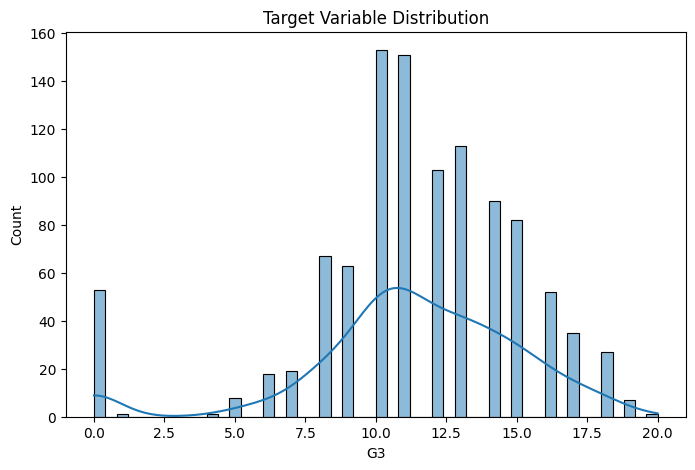

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(x=y, bins=50, kde=True)
plt.title("Target Variable Distribution")
plt.xlabel("G3")
plt.ylabel("Count")
plt.show()

In [36]:
# checking for skewness and kurtosis
from scipy.stats import skew, kurtosis
target_skewness = skew(y)
target_kurtosis = kurtosis(y)

print(f"Skewness of Target Variable: {target_skewness:.4f}")
print(f"Kurtosis of Target Variable: {target_kurtosis:.4f}")


Skewness of Target Variable: -0.9845
Kurtosis of Target Variable: 1.7302


## observation
- Since skew value is not less than -1 or greater than 1 then not skwed
- if kurtosis is = 3 then it is balanced but if more than 3 it is not balanced. if less than 3 it has few outliers

In [37]:
if abs(target_kurtosis - 3) < 0.5:
    print("Target variable is well-balanced.")
elif target_kurtosis > 3:
    print("High kurtosis detected! Consider applying transformations to reduce extreme values.")
elif target_kurtosis < 3:
    print("Low kurtosis detected. This usually means fewer outliers, which is not necessarily bad.")

Low kurtosis detected. This usually means fewer outliers, which is not necessarily bad.


# Transforming all categorical features via encoding

In [38]:
# since the categorical variables are not in any particular order, one hot encoder is used
num_features = list(X.select_dtypes(exclude="object").columns)

In [47]:
cat_features = list(X.select_dtypes(include="object").columns)

# rechecking for skweness in X numerical feature

In [39]:
# Check skewness of numerical features
skewness = X[num_features].apply(lambda x: x.skew())
skewed_features = skewness[abs(skewness) > 1].index.tolist()

In [40]:
skewed_features

['Traveltime', 'Failiurs', 'famrel', 'Dalc', 'Absence']

In [42]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to skewed features
transformer = PowerTransformer(method='yeo-johnson')
X[skewed_features] = transformer.fit_transform(X[skewed_features])

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
# Define preprocessing pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Check for imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


imbalance_ratio = y_train.value_counts(normalize=True)
if imbalance_ratio.max() > 0.7:  # Threshold for imbalance
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Applied SMOTE to balance the dataset.")


In [52]:
# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [53]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

In [54]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, mae, rmse))

In [55]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "RMSE"]).sort_values("R²", ascending=False)

In [56]:
results_df

,Model,R²,MAE,RMSE
7,Gradient Boosting,0.840798,0.901098,1.568885
5,Random Forest,0.831055,0.938325,1.616177
10,XGBoost,0.829231,0.982661,1.624878
1,Lasso Regression,0.819873,0.906434,1.668807
6,Extra Trees,0.818695,0.954306,1.674255
8,AdaBoost,0.817982,1.067332,1.677543
2,Ridge Regression,0.816904,0.985821,1.682502
0,Linear Regression,0.816829,0.985415,1.682849
9,SVR,0.744046,1.092583,1.989288
4,Decision Tree,0.673817,1.244019,2.245676


In [57]:
# Select best model based on R² score
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R²']
print(f"Best Model: {best_model_name} with R² Score: {best_r2:.4f}")

Best Model: Gradient Boosting with R² Score: 0.8408


In [58]:
# Perform hyperparameter tuning on best model
best_model = models[best_model_name]
param_grid = {
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "Lasso Regression": {'alpha': [0.01, 0.1, 1, 10]},
    "Extra Trees": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [59]:
from sklearn.model_selection import GridSearchCV
if best_model_name in param_grid:
    grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    final_model = grid_search.best_estimator_
    final_params = grid_search.best_params_
    print(f"Best Parameters for {best_model_name}: {final_params}")


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}


C:\Users\eMIKE\AppData\Local\Temp\ipykernel_4032\2526397044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Model", data=results_df, palette="coolwarm")
C:\Users\eMIKE\AppData\Local\Temp\ipykernel_4032\2526397044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=results_df, palette="coolwarm")
C:\Users\eMIKE\AppData\Local\Temp\ipykernel_4032\2526397044.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MAE", y="Model", data=results_df, palette="coolwarm")


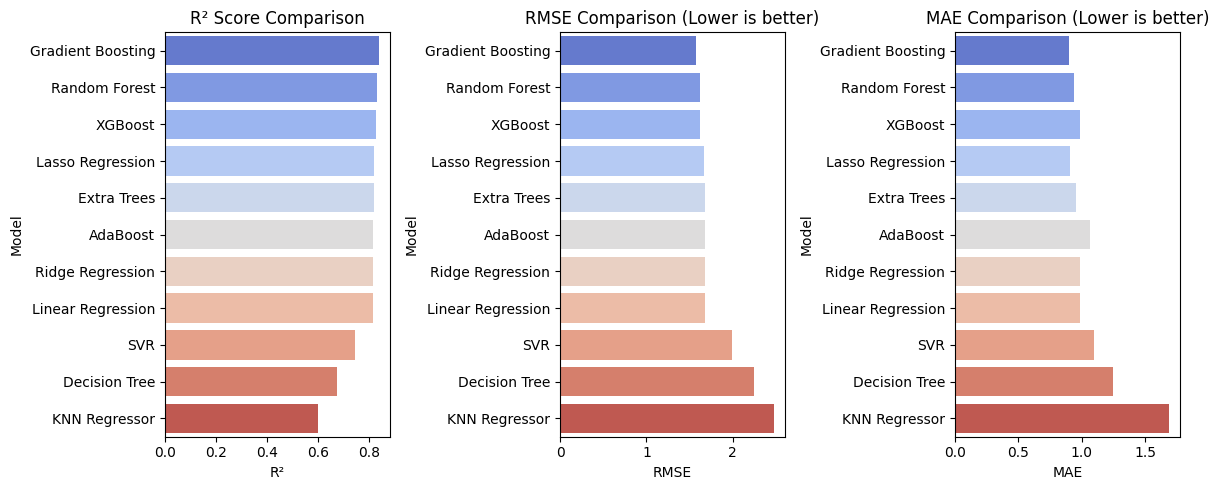

In [60]:
#  Model Performance Comparison (Plots)
plt.figure(figsize=(12, 5))

# Plot R² scores
plt.subplot(1, 3, 1)
sns.barplot(x="R²", y="Model", data=results_df, palette="coolwarm")
plt.title("R² Score Comparison")

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(x="RMSE", y="Model", data=results_df, palette="coolwarm")
plt.title("RMSE Comparison (Lower is better)")

# Plot MAE
plt.subplot(1, 3, 3)
sns.barplot(x="MAE", y="Model", data=results_df, palette="coolwarm")
plt.title("MAE Comparison (Lower is better)")

plt.tight_layout()
plt.show()

In [61]:
if best_model_name in param_grid:
    grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    final_model = grid_search.best_estimator_
    final_params = grid_search.best_params_
    print(f"Best Parameters for {best_model_name}: {final_params}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}


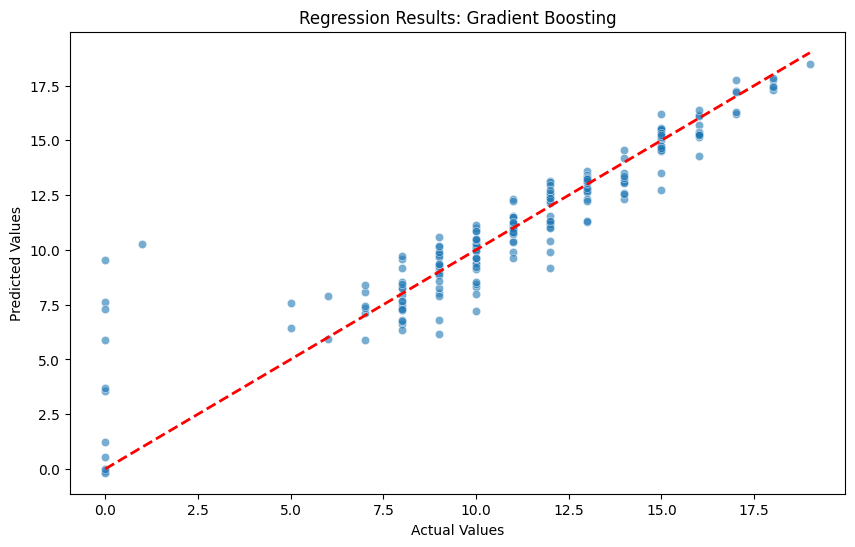

In [62]:
# Implement the best model and plot regression results
y_final_pred = final_model.predict(X_test_transformed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_final_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Regression Results: {best_model_name}")
plt.show()

# Overview of the machine learning model selction
- check for duplicates and missing value
- divide data to X and y
- check for skwedness and kurtosis.
- apply neccessary solutions depending on the problem wheather regression or classification
- do train test split,
- create pipelines for feature encoding
- create pipeline of different models to be tested.
- evaluate model and ensure that the best is selcted.
- impliment a plot to show models and how best they perform.
- impliment the best model and create the plot for regression or classification